# Machine Learning

## Loading the Clean Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv
loan_data_df = pd.read_csv('clean_loan_data.csv')

## Random Forest Implementation

### Training and/or Model Loading Phase

In [ ]:
# Split data to isolate target variable
X = loan_data_df.drop(columns=['loan_status','id'], axis=1)
y = loan_data_df['loan_status']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Transform categorical data
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If the model exists, load it
if os.path.exists('random_forest_model.plk'):
  best_rf = joblib.load('random_forest_model.plk')
  print('Model loaded from file.')
else:
  print('Model not found. Training a new model...')

  # Define the parameter grid for GridSearchCV
  param_grid = {
      'n_estimators': [10, 20, 30, 50, 100],
      'max_depth': [None, 10, 20, 30, 40],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Train the model
  random_forest_model = RandomForestClassifier(criterion='entropy', random_state=42)
  grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # Best model from GridSearchCV
  best_rf = grid_search.best_estimator_
  print(f"Best Random Forest Model: {best_rf}")
  print(f"Best Hyperparameters: {grid_search.best_params_}")

  # Save the trained model
  joblib.dump(best_rf, 'random_forest_model.plk')
  print('Model trained and saved to file.')

# Predict target variable
y_pred_best = best_rf.predict(X_test)

Model loaded from file.


### Model Evaluation Phase

Confusion Matrix:


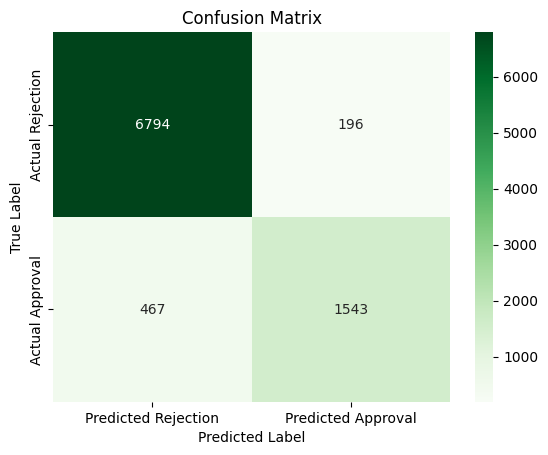


Accuracy: 92.63%
Precision: 88.73%
Recall: 76.77%
F1 Score: 82.32%

Cross-validation scores: [0.92577778 0.92622222 0.92888889 0.928      0.93266667 0.92177778
 0.92666667 0.93066667 0.92577778 0.92577778]
Average accuracy: 92.72%

Feature Importances:
                   Feature  Importance
12  previous_loan_defaults    0.316104
9      loan_percent_income    0.149603
8            loan_int_rate    0.147155
3            annual_income    0.113931
5    home_ownership_status    0.069399
6                loan_amnt    0.053331
11            credit_score    0.044460
7              loan_intent    0.031663
0                      age    0.021460
4      years_of_employment    0.019663
10    years_of_credit_hist    0.017997
2                education    0.010788
1                   gender    0.004446


In [ ]:
# Evaluate Performance
random_forest_cm = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix:")
sns.heatmap(random_forest_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted Rejection', 'Predicted Approval'],
            yticklabels=['Actual Rejection', 'Actual Approval'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print all metrics
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best)* 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_best)* 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_best)* 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_best)* 100:.2f}%")

# Use k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_rf, X, y, cv=kf, scoring='accuracy')
print("\nCross-validation scores:", scores)
print(f"Average accuracy: {scores.mean()* 100:.2f}%")

# Extract feature importances from the model
feature_importances = best_rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(f"\nFeature Importances:\n{feature_importances_df}")

## Decision Tree Implementation

### Training and/or Model Loading Phase

In [ ]:
# Split data to isolate target variable
X = loan_data_df.drop(columns=['loan_status', 'id'], axis=1)
y = loan_data_df['loan_status']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Transform categorical data
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If the model exists, load it
if os.path.exists('decision_tree_model.plk'):
  best_dt = joblib.load('decision_tree_model.plk')
  print('Model loaded from file.')
else:
  print('Model not found. Training a new model...')

  # Define the parameter grid for GridSearchCV
  param_grid = {
      'max_depth': [10, 20, 30, None],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Train the model
  decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
  grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # Best model from GridSearchCV
  best_dt = grid_search.best_estimator_
  print(f"Best Random Forest Model: {best_dt}")
  print(f"Best Hyperparameters: {grid_search.best_params_}")

  # Save the trained model
  joblib.dump(best_dt, 'decision_tree_model.plk')
  print('Model trained and saved to file.')

# Predict target variable
y_pred_best = best_dt.predict(X_test)

Model loaded from file.


### Evaluation Phase

Confusion Matrix:


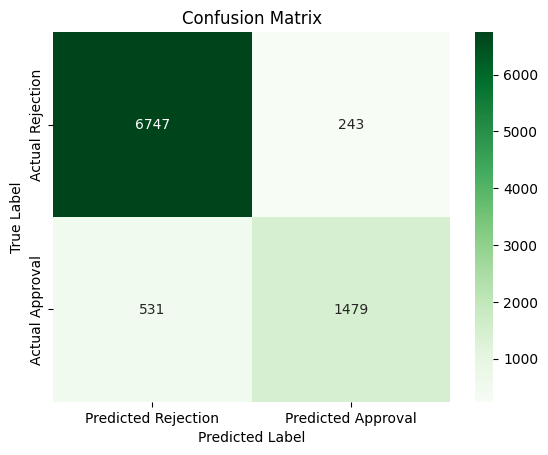


Accuracy: 91.40%
Precision: 85.89%
Recall: 73.58%
F1 Score: 79.26%

Cross-validation scores: [0.91488889 0.92066667 0.918      0.91866667 0.91933333 0.91288889
 0.91533333 0.92333333 0.92022222 0.91533333]
Average accuracy: 91.79%

                   Feature  Importance
12  previous_loan_defaults    0.509767
9      loan_percent_income    0.147024
8            loan_int_rate    0.141819
3            annual_income    0.082518
5    home_ownership_status    0.061988
7              loan_intent    0.025772
11            credit_score    0.020686
6                loan_amnt    0.004128
0                      age    0.002642
10    years_of_credit_hist    0.001276
4      years_of_employment    0.001221
2                education    0.001160
1                   gender    0.000000


In [ ]:
# Evaluate Performance
decision_tree_cm = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix:")
sns.heatmap(decision_tree_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted Rejection', 'Predicted Approval'],
            yticklabels=['Actual Rejection', 'Actual Approval'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print all metrics
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best)* 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_best)* 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_best)* 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_best)* 100:.2f}%")

# Use k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_dt, X, y, cv=kf, scoring='accuracy')
print("\nCross-validation scores:", scores)
print(f"Average accuracy: {scores.mean()* 100:.2f}%")

# Extract feature importances from the model
feature_importances = best_dt.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(f"\n{feature_importances_df}")

## Gaussian Naive Bayes Implementation

### Training and/or Model Loading Phase

In [ ]:
# Split data to isolate target variable
X = loan_data_df.drop(columns=['loan_status', 'id'], axis=1)
y = loan_data_df['loan_status']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Transform categorical data
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If the model exists, load it
if os.path.exists('gaussian_naive_bayes_model.plk'):
  gnb_model = joblib.load('gaussian_naive_bayes_model.plk')
  print('Model loaded from file.')
else:
  print('Model not found. Training a new model...')

  # Train the model
  gnb_model = GaussianNB()
  gnb_model.fit(X_train, y_train)

  # Save the trained model
  joblib.dump(gnb_model, 'gaussian_naive_bayes_model.plk')
  print('Model trained and saved to file.')

# Predict target variable
y_pred = gnb_model.predict(X_test)

Model loaded from file.


### Model Evaluation Phase

Confusion Matrix:


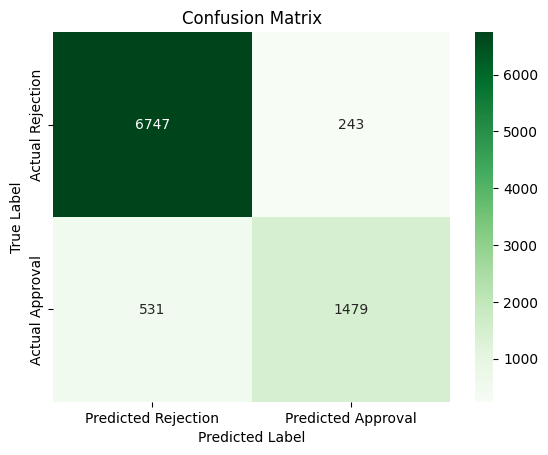


Accuracy: 81.06%
Precision: 66.49%
Recall: 30.60%
F1 Score: 41.91%

Cross-validation scores: [0.79977778 0.81977778 0.81511111 0.82222222 0.80533333 0.81711111
 0.81288889 0.81955556 0.818      0.81511111]
Average accuracy: 81.45%


In [ ]:
# Evaluate Performance
gnb_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
sns.heatmap(decision_tree_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted Rejection', 'Predicted Approval'],
            yticklabels=['Actual Rejection', 'Actual Approval'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print all metrics
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)* 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)* 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred)* 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred)* 100:.2f}%")

# Use k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gnb_model, X, y, cv=kf, scoring='accuracy')
print("\nCross-validation scores:", scores)
print(f"Average accuracy: {scores.mean()* 100:.2f}%")